# Deep Learning | Model Optimization

## Load and Preprocess the Data

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
X, y = data.data, data.target - 1  # make 0-indexed

X.shape

(581012, 54)

 Tabular Data with **581,012 rows** and **54 columns**

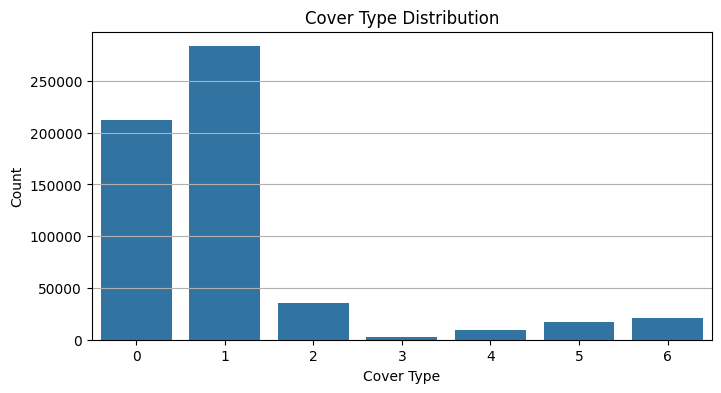

In [ ]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [ ]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64


In [ ]:
print("\nClass distribution percentage:")
print(pd.Series(y).value_counts(normalize=True).sort_index() * 100)


Class distribution percentage:
0   36.46
1   48.76
2    6.15
3    0.47
4    1.63
5    2.99
6    3.53
Name: proportion, dtype: float64


**Imbalanced Dataset:** As certain output categories have much higher percentage and others have lower.

In [ ]:
# One-hot encode targets
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)


# Standardize inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((464809, 54), (116203, 54), (464809, 7), (116203, 7))

## Baseline MLP Model (Learning Rate =0.01, epochs = 30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import metrics

baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.summary()

baseline_model.compile(optimizer=Adam(learning_rate=0.01),
                       loss='categorical_crossentropy',
                       metrics=['accuracy',
                                ])

history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=128,
                                      verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,103 (70.71 KB)

 Trainable params: 18,103 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7227 - loss: 0.6530 - val_accuracy: 0.7891 - val_loss: 0.5033
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7977 - loss: 0.4845 - val_accuracy: 0.8086 - val_loss: 0.4632
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8164 - loss: 0.4464 - val_accuracy: 0.8225 - val_loss: 0.4384
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8231 - loss: 0.4348 - val_accuracy: 0.8223 - val_loss: 0.4494
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8337 - loss: 0.4156 - val_accuracy: 0.8402 - val_loss: 0.4037
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8393 - loss: 0.4035 - val_accuracy: 0.8342 - val_loss: 0.4028
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8418 - loss: 0.3986 - val_accuracy: 0.8449 - val_loss: 0.3960
Epoch 8/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8473 - loss: 0

### Learning Curve - Baseline Model

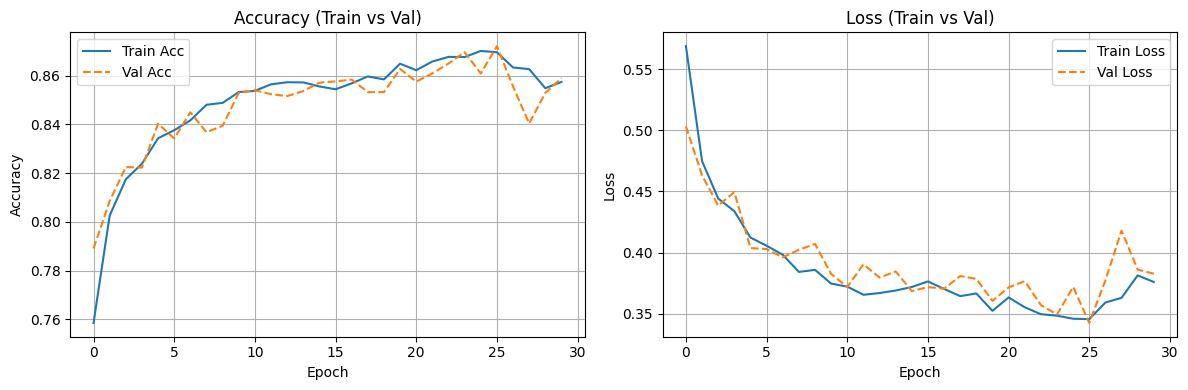

In [ ]:
dfig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_baseline.history['accuracy'], label='Train Acc')
axs[0].plot(history_baseline.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_baseline.history['loss'], label='Train Loss')
axs[1].plot(history_baseline.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Evaluation - Baseline Model

In [ ]:
train_loss, train_accuracy = baseline_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test, verbose=0)

from sklearn.metrics import classification_report

# Predict class probabilities
y_train_pred_probs = baseline_model.predict(X_train)
y_test_pred_probs = baseline_model.predict(X_test)

# Convert one-hot to class labels
y_train_true = y_train.argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

y_train_pred = y_train_pred_probs.argmax(axis=1)
y_test_pred = y_test_pred_probs.argmax(axis=1)

# Print classification reports
print("\n Train Classification Report")
print(classification_report(y_train_true, y_train_pred, digits=2))

print(" Test Classification Report")
print(classification_report(y_test_true, y_test_pred, digits=2))

# Also show accuracy and loss separately
print(f" Train Accuracy: {train_accuracy:.2f}")
print(f" Test Accuracy : {test_accuracy:.2f}")
print(f" Train Loss    : {train_loss:.2f}")
print(f" Test Loss     : {test_loss:.2f}")


14526/14526 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

 Train Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86    169472
           1       0.86      0.92      0.89    226640
           2       0.79      0.89      0.84     28603
           3       0.88      0.57      0.69      2198
           4       0.57      0.40      0.47      7594
           5       0.76      0.54      0.63     13894
           6       0.91      0.88      0.89     16408

    accuracy                           0.86    464809
   macro avg       0.81      0.72      0.75    464809
weighted avg       0.86      0.86      0.86    464809

 Test Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     42368
           1       0.85      0.92      0.88     56661
           2       0.79      0.89      0.84      7151
           3       0.87      0.56      

## Test1-Model (Changing Learning Rate to 0.001, epochs =30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import metrics

test1_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

test1_model.summary()

test1_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy',
                                ])

history_test1_model = test1_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=128,
                                      verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,103 (70.71 KB)

 Trainable params: 18,103 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6910 - loss: 0.7567 - val_accuracy: 0.7950 - val_loss: 0.4800
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8017 - loss: 0.4648 - val_accuracy: 0.8031 - val_loss: 0.4644
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8266 - loss: 0.4098 - val_accuracy: 0.8278 - val_loss: 0.4129
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8408 - loss: 0.3802 - val_accuracy: 0.8452 - val_loss: 0.3731
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8530 - loss: 0.3548 - val_accuracy: 0.8580 - val_loss: 0.3421
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8600 - loss: 0.3375 - val_accuracy: 0.8619 - val_loss: 0.3366
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8667 - loss: 0.3234 - val_accuracy: 0.8656 - val_loss: 0.3293
Epoch 8/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8725 - loss: 0.

Learning Curve - Test1 Model

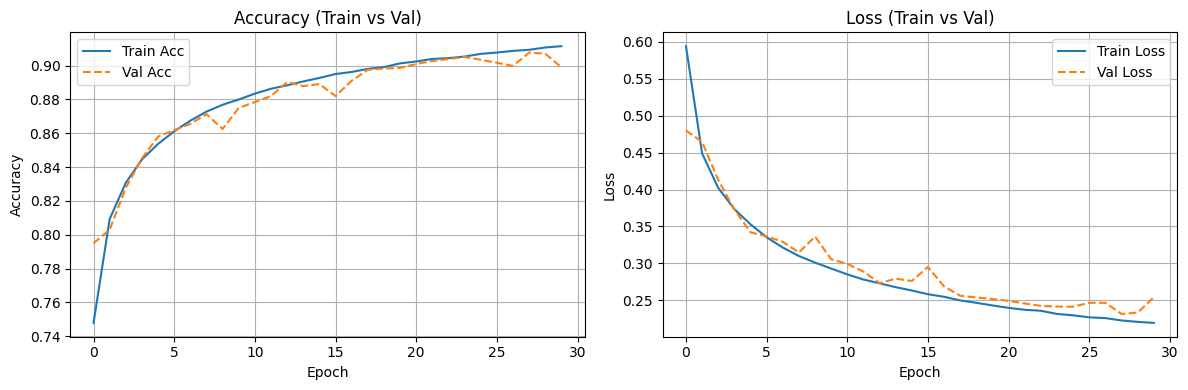

In [ ]:
dfig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_test1_model.history['accuracy'], label='Train Acc')
axs[0].plot(history_test1_model.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_test1_model.history['loss'], label='Train Loss')
axs[1].plot(history_test1_model.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Evaluation - Test1 Model

In [ ]:
train_loss, train_accuracy = test1_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = test1_model.evaluate(X_test, y_test, verbose=0)

from sklearn.metrics import classification_report

# Predict class probabilities
y_train_pred_probs = test1_model.predict(X_train)
y_test_pred_probs = test1_model.predict(X_test)

# Convert one-hot to class labels
y_train_true = y_train.argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

y_train_pred = y_train_pred_probs.argmax(axis=1)
y_test_pred = y_test_pred_probs.argmax(axis=1)

# Print classification reports
print("\n Train Classification Report")
print(classification_report(y_train_true, y_train_pred, digits=2))

print(" Test Classification Report")
print(classification_report(y_test_true, y_test_pred, digits=2))

# Also show accuracy and loss separately
print(f" Train Accuracy: {train_accuracy:.2f}")
print(f" Test Accuracy : {test_accuracy:.2f}")
print(f" Train Loss    : {train_loss:.2f}")
print(f" Test Loss     : {test_loss:.2f}")

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

 Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.90    169472
           1       0.88      0.97      0.92    226640
           2       0.91      0.90      0.90     28603
           3       0.89      0.73      0.80      2198
           4       0.86      0.61      0.71      7594
           5       0.83      0.81      0.82     13894
           6       0.92      0.92      0.92     16408

    accuracy                           0.90    464809
   macro avg       0.89      0.83      0.85    464809
weighted avg       0.91      0.90      0.90    464809

 Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     42368
           1       0.87      0.96      0.92     56661
           2       0.90      0.89      0.90      7151
           3       0.89      0.71      

## Test2-Model (Learning Rate = 0.001, Increasing Epochsto 120)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

test2_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

test2_model.summary()

test2_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


history_test2_model = test2_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=120,
                                      batch_size=128,
                                      verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,103 (70.71 KB)

 Trainable params: 18,103 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7002 - loss: 0.7172 - val_accuracy: 0.7812 - val_loss: 0.5104
Epoch 2/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7956 - loss: 0.4752 - val_accuracy: 0.8181 - val_loss: 0.4332
Epoch 3/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8215 - loss: 0.4226 - val_accuracy: 0.8354 - val_loss: 0.3944
Epoch 4/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8402 - loss: 0.3815 - val_accuracy: 0.8505 - val_loss: 0.3642
Epoch 5/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8524 - loss: 0.3550 - val_accuracy: 0.8572 - val_loss: 0.3475
Epoch 6/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8597 - loss: 0.3380 - val_accuracy: 0.8626 - val_loss: 0.3349
Epoch 7/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8676 - loss: 0.3223 - val_accuracy: 0.8662 - val_loss: 0.3275
Epoch 8/120
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8725 - 

###Learning Curve - test2 Model

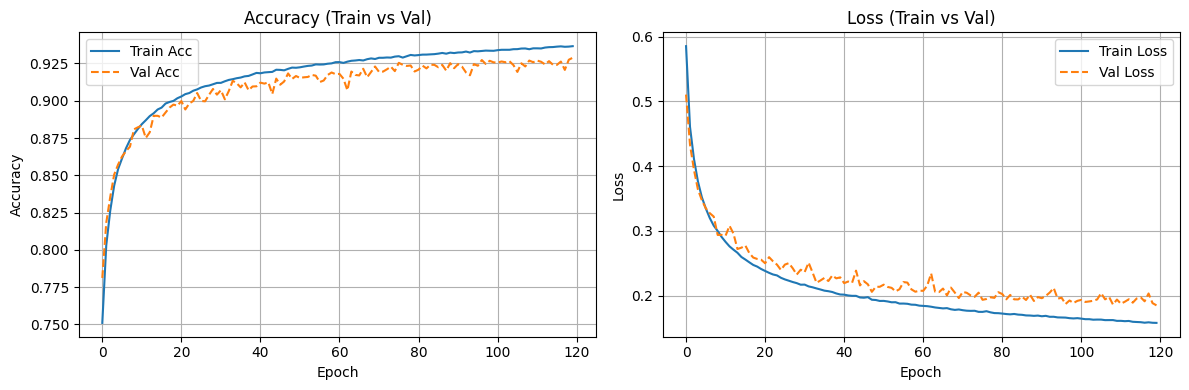

In [ ]:
dfig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_test2_model.history['accuracy'], label='Train Acc')
axs[0].plot(history_test2_model.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_test2_model.history['loss'], label='Train Loss')
axs[1].plot(history_test2_model.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Evaluation - Test2 Model

In [ ]:
train_loss, train_accuracy = test2_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = test2_model.evaluate(X_test, y_test, verbose=0)

from sklearn.metrics import classification_report

# Predict class probabilities
y_train_pred_probs = test2_model.predict(X_train)
y_test_pred_probs = test2_model.predict(X_test)

# Convert one-hot to class labels
y_train_true = y_train.argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

y_train_pred = y_train_pred_probs.argmax(axis=1)
y_test_pred = y_test_pred_probs.argmax(axis=1)

# Print classification reports
print("\n Train Classification Report")
print(classification_report(y_train_true, y_train_pred, digits=2))

print(" Test Classification Report")
print(classification_report(y_test_true, y_test_pred, digits=2))

# Also show accuracy and loss separately
print(f" Train Accuracy: {train_accuracy:.2f}")
print(f" Test Accuracy : {test_accuracy:.2f}")
print(f" Train Loss    : {train_loss:.2f}")
print(f" Test Loss     : {test_loss:.2f}")

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

 Train Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    169472
           1       0.95      0.95      0.95    226640
           2       0.93      0.93      0.93     28603
           3       0.90      0.81      0.86      2198
           4       0.81      0.84      0.83      7594
           5       0.83      0.92      0.87     13894
           6       0.95      0.95      0.95     16408

    accuracy                           0.94    464809
   macro avg       0.90      0.91      0.90    464809
weighted avg       0.94      0.94      0.94    464809

 Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     42368
           1       0.94      0.94      0.94     56661
           2       0.92      0.93      0.92      7151
           3       0.87      0.76      

## Test7 Model - (Earlystop, ReduceLROnPlateau , epoch = 150)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

test7_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

test7_model.summary()

test7_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_fetch_covtype_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history_test7_model = test7_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      epochs=150,
                                      batch_size=128,
                                      verbose=1)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,103 (70.71 KB)

 Trainable params: 18,103 (70.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
2894/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.7329
Epoch 1: val_loss improved from inf to 0.50359, saving model to best_fetch_covtype_model.keras
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6938 - loss: 0.7323 - val_accuracy: 0.7841 - val_loss: 0.5036 - learning_rate: 0.0010
Epoch 2/150
2903/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4771
Epoch 2: val_loss improved from 0.50359 to 0.43610, saving model to best_fetch_covtype_model.keras
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7972 - loss: 0.4771 - val_accuracy: 0.8135 - val_loss: 0.4361 - learning_rate: 0.0010
Epoch 3/150
2904/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8259 - loss: 0.4156
Epoch 3: val_loss improved from 0.43610 to 0.39001, saving model to best_fetch_covtype_model.keras
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8259 - loss: 0.4156 - val_accuracy: 0.8374 - val_loss: 0.3900 - learning_rate: 0.0010
Epoch 4/

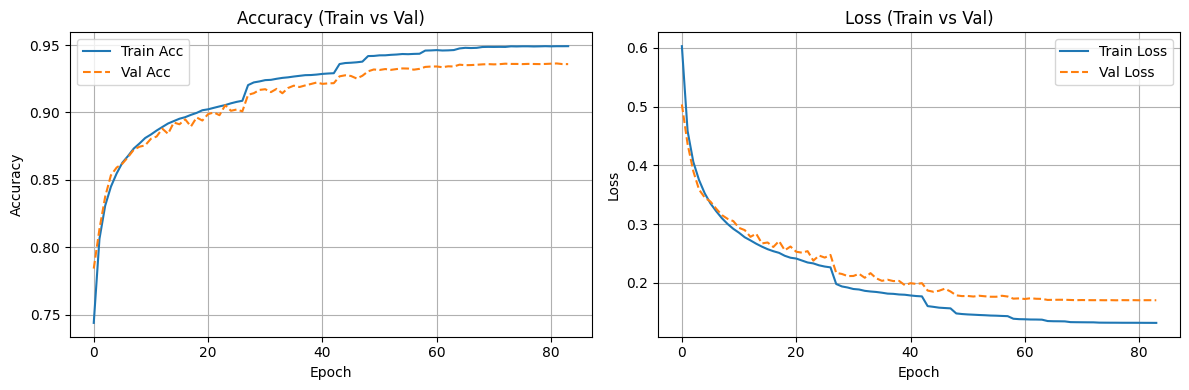

In [ ]:
dfig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_test7_model.history['accuracy'], label='Train Acc')
axs[0].plot(history_test7_model.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_test7_model.history['loss'], label='Train Loss')
axs[1].plot(history_test7_model.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
train_loss, train_accuracy = test7_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = test7_model.evaluate(X_test, y_test, verbose=0)

from sklearn.metrics import classification_report

# Predict class probabilities
y_train_pred_probs = test7_model.predict(X_train)
y_test_pred_probs = test7_model.predict(X_test)

# Convert one-hot to class labels
y_train_true = y_train.argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

y_train_pred = y_train_pred_probs.argmax(axis=1)
y_test_pred = y_test_pred_probs.argmax(axis=1)

# Print classification reports
print("\n Train Classification Report")
print(classification_report(y_train_true, y_train_pred, digits=2))

print(" Test Classification Report")
print(classification_report(y_test_true, y_test_pred, digits=2))

# Also show accuracy and loss separately
print(f" Train Accuracy: {train_accuracy:.4f}")
print(f" Test Accuracy : {test_accuracy:.4f}")
print(f" Train Loss    : {train_loss:.4f}")
print(f" Test Loss     : {test_loss:.4f}")

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

 Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94    169472
           1       0.95      0.96      0.95    226640
           2       0.94      0.95      0.95     28603
           3       0.89      0.84      0.87      2198
           4       0.88      0.82      0.85      7594
           5       0.90      0.90      0.90     13894
           6       0.96      0.96      0.96     16408

    accuracy                           0.95    464809
   macro avg       0.93      0.91      0.92    464809
weighted avg       0.95      0.95      0.95    464809

 Test Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     42368
           1       0.94      0.95      0.94     56661
           2       0.93      0.93      0.93      7151
           3       0.85      0.81      

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


# Predict on train and test
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("\n✅ Test Classification Report")
print(classification_report(y_test, test_preds, digits=4))

print(" Train Accuracy: ",train_accuracy)
print(" Test Accuracy: ",test_accuracy)


✅ Test Classification Report
              precision    recall  f1-score   support

           0     0.9668    0.9372    0.9518     42368
           1     0.9524    0.9699    0.9611     56661
           2     0.9503    0.9438    0.9470      7151
           3     0.9280    0.7978    0.8580       549
           4     0.9608    0.7351    0.8329      1899
           5     0.9527    0.8583    0.9031      3473
           6     0.9754    0.9393    0.9570      4102

   micro avg     0.9582    0.9473    0.9527    116203
   macro avg     0.9552    0.8831    0.9158    116203
weighted avg     0.9584    0.9473    0.9524    116203
 samples avg     0.9473    0.9473    0.9473    116203

 Train Accuracy:  1.0
 Test Accuracy:  0.9473163343459291


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary

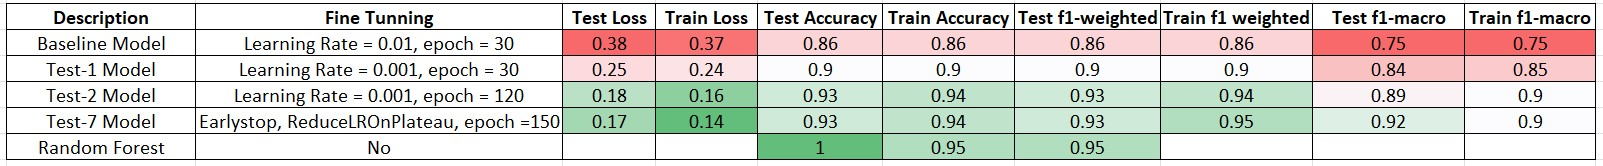

Tree-based ensemble methods like Random Forests and Gradient Boosting often outperform MLPs on structured/tabular datasets because they naturally handle heterogeneous feature types, missing values, and non-linear interactions without much preprocessing. They are also less sensitive to feature scaling and typically require less tuning. In contrast, MLPs may overfit or underperform on tabular data unless carefully designed and regularized.